In [1]:
!pip install pycaret

     |████████████████████████████████| 301 kB 5.6 MB/s 
     |████████████████████████████████| 114 kB 34.7 MB/s 
     |████████████████████████████████| 6.8 MB 33.3 MB/s 
     |████████████████████████████████| 1.7 MB 37.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 3.1 MB/s 
     |████████████████████████████████| 261 kB 32.4 MB/s 
     |████████████████████████████████| 1.3 MB 33.6 MB/s 
     |████████████████████████████████| 16.5 MB 187 kB/s 
     |████████████████████████████████| 167 kB 34.7 MB/s 
     |████████████████████████████████| 2.0 MB 31.5 MB/s 
     |████████████████████████████████| 86 kB 2.0 MB/s 
     |████████████████████████████████| 10.9 MB 35.7 MB/s 
     |████████████████████████████████| 102 kB 5.6 MB/s 
     |████████████████████████████████| 675 kB 37.8 MB/s 
     |██████████████████

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import plotly.express as px
import pandas as pd
import numpy as np
coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_st/meteorological_models/distan_lat42.225lon-8.63p10R4Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [4]:
import pandas as pd
station_all=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_st/meteorological_station/LEVX.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
print(station_all)
station_all["spd_o"].describe()

                         temp_o     tempd_o    rh_o  dir_o     spd_o  \
time                                                                   
2008-01-01 00:00:00  278.550001  277.950000   95.91  220.0  3.601108   
2008-01-01 01:00:00  278.050000  277.450001   95.89  230.0  3.086664   
2008-01-01 02:00:00  278.050000  277.649999   97.24  190.0  5.144440   
2008-01-01 02:30:00  276.150001  275.149999   93.14  240.0  3.601108   
2008-01-01 03:00:00  278.750001  277.549999   91.98  230.0  3.086664   
...                         ...         ...     ...    ...       ...   
2020-12-24 21:30:00  278.150000  278.150000  100.00   50.0  2.572220   
2020-12-24 22:00:00  278.150000  277.150000   93.24   60.0  2.057776   
2020-12-24 22:30:00  278.150000  277.150000   93.24   80.0  1.543332   
2020-12-24 23:00:00  278.150000  277.150000   93.24   30.0  3.601108   
2020-12-24 23:30:00  278.150000  277.150000   93.24   40.0  3.086664   

                    wind_gust_o  mslp_o  visibility_o skyc1_o s

count    221240.000000
mean          2.934942
std           2.021558
min           0.000000
25%           1.543332
50%           2.572220
75%           4.115552
max          22.121092
Name: spd_o, dtype: float64

In [5]:
#resample visibility minor hour before
station=station_all[["spd_o","temp_o"]].resample("H",label="right").mean()
station

,spd_o,temp_o
time,,
2008-01-01 01:00:00,3.601108,278.550001
2008-01-01 02:00:00,3.086664,278.050000
2008-01-01 03:00:00,4.372774,277.100000
2008-01-01 04:00:00,3.343886,277.950001
2008-01-01 05:00:00,4.372774,275.799999
...,...,...
2020-12-24 20:00:00,1.543332,280.149999
2020-12-24 21:00:00,1.028888,279.150000
2020-12-24 22:00:00,2.057776,278.150000


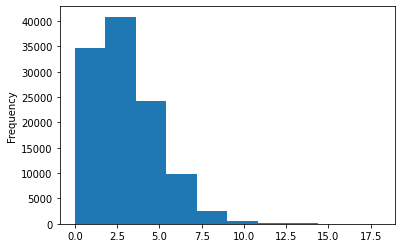

In [6]:
from locale import normalize
#station.value_counts()
station["spd_o"].plot.hist();

**Forecast D1**

In [7]:
#ria forecast d1
model4k=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_st/meteorological_models/lat42.225lon-8.63p10R4KmD1.csv",parse_dates=["time"]).set_index("time")
model4k

,dir0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,lwflx0,conv_prec0,...,cape9,cin9,cfh9,cfl9,cfm9,cft9,HGT5009,HGT8509,T5009,T8509
time,,,,,,,,,,,,,,,,,,,,,
2008-01-02 00:00:00,187.022110,8.649026,15.076856,100682.117188,284.099640,0.950480,3850.537842,18.529049,365.889740,0.43,...,0.000000,-0.000117,0.0,1.001866,1.0000,1.001866,5441.062012,1395.217041,250.198868,277.625000
2008-01-02 01:00:00,223.194687,4.872746,8.553699,100766.039062,284.302551,0.952351,24042.478516,7.432752,365.840179,1.41,...,271.859985,-0.630313,1.0,1.003662,1.0000,1.003662,5421.849121,1390.475952,249.379623,276.878235
2008-01-02 02:00:00,213.398468,4.058958,7.745996,100725.421875,283.516113,0.931136,24043.144531,10.536634,361.979858,0.15,...,265.820007,-2.348477,0.0,0.003704,0.0000,0.003704,5403.857910,1385.831055,247.717194,276.178528
2008-01-02 03:00:00,193.151459,4.297006,8.272406,100640.812500,283.482239,0.911970,24036.058594,16.033491,323.539062,0.66,...,271.260010,-4.300562,1.0,0.000267,1.0000,1.000000,5392.368164,1382.380981,247.006317,275.906799
2008-01-02 04:00:00,185.437576,5.599997,9.705170,100599.703125,283.220490,0.917263,24037.439453,16.895048,324.586517,1.60,...,274.359985,-3.418750,1.0,0.003440,1.0000,1.000000,5385.979004,1380.468018,246.807068,276.245819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-12 19:00:00,157.686142,1.743530,4.707931,102008.992188,286.765930,0.922937,24102.066406,4.728705,312.395416,0.00,...,0.000000,-0.002773,0.0,0.500000,0.4000,0.500000,5657.847168,1509.066895,256.351013,281.325867
2020-11-12 20:00:00,132.306030,0.214833,3.802512,102066.460938,286.126678,0.942450,24164.826172,2.759448,370.614349,0.00,...,0.000000,0.000352,0.0,0.300000,0.5000,0.500000,5660.977051,1513.237671,256.373871,281.351135
2020-11-12 21:00:00,136.384262,1.121570,5.705152,102124.367188,286.267761,0.931932,24214.123047,3.625571,351.971375,0.00,...,0.000000,0.000469,0.0,0.300000,0.0625,0.300000,5664.547852,1517.838257,256.420868,280.955627


In [8]:
df_all4k=pd.concat([station,model4k],axis=1).dropna()
df_all4k

,spd_o,temp_o,dir0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,...,cape9,cin9,cfh9,cfl9,cfm9,cft9,HGT5009,HGT8509,T5009,T8509
time,,,,,,,,,,,,,,,,,,,,,
2008-01-02 00:00:00,3.858330,281.650001,187.022110,8.649026,15.076856,100682.117188,284.099640,0.950480,3850.537842,18.529049,...,0.000000,-0.000117,0.0,1.001866,1.0000,1.001866,5441.062012,1395.217041,250.198868,277.625000
2008-01-02 01:00:00,4.372774,281.650001,223.194687,4.872746,8.553699,100766.039062,284.302551,0.952351,24042.478516,7.432752,...,271.859985,-0.630313,1.0,1.003662,1.0000,1.003662,5421.849121,1390.475952,249.379623,276.878235
2008-01-02 02:00:00,6.173328,281.650001,213.398468,4.058958,7.745996,100725.421875,283.516113,0.931136,24043.144531,10.536634,...,265.820007,-2.348477,0.0,0.003704,0.0000,0.003704,5403.857910,1385.831055,247.717194,276.178528
2008-01-02 03:00:00,6.173328,281.450000,193.151459,4.297006,8.272406,100640.812500,283.482239,0.911970,24036.058594,16.033491,...,271.260010,-4.300562,1.0,0.000267,1.0000,1.000000,5392.368164,1382.380981,247.006317,275.906799
2008-01-02 04:00:00,3.343886,280.749999,185.437576,5.599997,9.705170,100599.703125,283.220490,0.917263,24037.439453,16.895048,...,274.359985,-3.418750,1.0,0.003440,1.0000,1.000000,5385.979004,1380.468018,246.807068,276.245819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-12 19:00:00,2.829442,289.150000,157.686142,1.743530,4.707931,102008.992188,286.765930,0.922937,24102.066406,4.728705,...,0.000000,-0.002773,0.0,0.500000,0.4000,0.500000,5657.847168,1509.066895,256.351013,281.325867
2020-11-12 20:00:00,2.829442,288.650000,132.306030,0.214833,3.802512,102066.460938,286.126678,0.942450,24164.826172,2.759448,...,0.000000,0.000352,0.0,0.300000,0.5000,0.500000,5660.977051,1513.237671,256.373871,281.351135
2020-11-12 21:00:00,3.086664,288.650000,136.384262,1.121570,5.705152,102124.367188,286.267761,0.931932,24214.123047,3.625571,...,0.000000,0.000469,0.0,0.300000,0.0625,0.300000,5664.547852,1517.838257,256.420868,280.955627


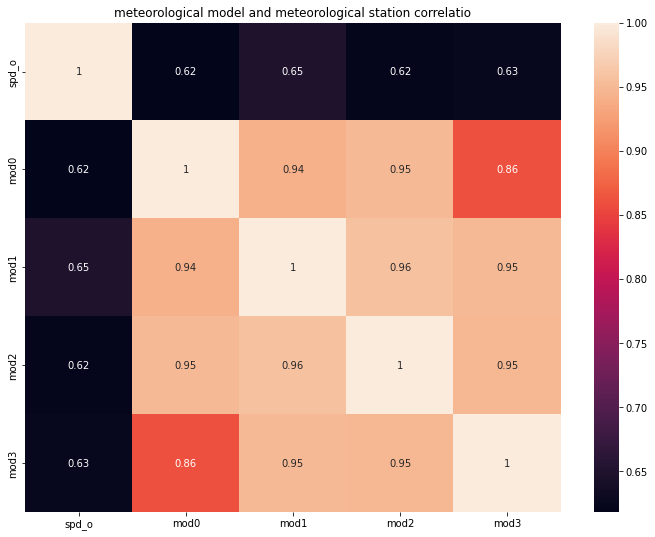

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("meteorological model and meteorological station correlatio")
metmodel_Rs=df_all4k[["spd_o","mod0","mod1","mod2","mod3",]].corr()

sns.heatmap(metmodel_Rs,annot=True);

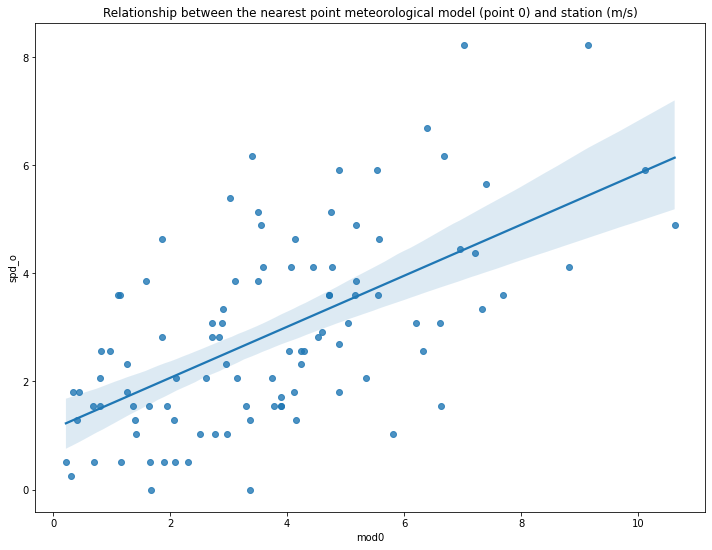

In [10]:
plt.figure(figsize=(12, 9))
plt.title("Relationship between the nearest point meteorological model (point 0) and station (m/s)")
df_sample=df_all4k[["mod0","spd_o"]]
sns.regplot( x="mod0", y="spd_o",data=df_sample.sample(100),);

In [11]:
df_sample

,mod0,spd_o
time,,
2008-01-02 00:00:00,8.649026,3.858330
2008-01-02 01:00:00,4.872746,4.372774
2008-01-02 02:00:00,4.058958,6.173328
2008-01-02 03:00:00,4.297006,6.173328
2008-01-02 04:00:00,5.599997,3.343886
...,...,...
2020-11-12 19:00:00,1.743530,2.829442
2020-11-12 20:00:00,0.214833,2.829442
2020-11-12 21:00:00,1.121570,3.086664


In [12]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


#MAE en kt
MAE=round(mean_absolute_error(df_sample.mod0,df_sample.spd_o ),4)
#MSE en kt
MSE=round(mean_squared_error(df_sample.mod0,df_sample.spd_o),4)
#R2
R2=round(r2_score(df_sample.mod0,df_sample.spd_o),2)


df_r=pd.DataFrame({"MAE":MAE,"MSE":MSE,"R2":R2},index=["results"]);
df_r

,MAE,MSE,R2
results,1.5796,4.3315,0.22


**machine learning d0 or d1**

In [13]:
from pycaret.regression import *

reg = setup(df_all4k,
             target = 'spd_o',
             session_id=20,normalize=False ,train_size=.85,remove_multicollinearity=True,
             ignore_low_variance=True,feature_selection=True,
             feature_selection_threshold =.15,pca=False,polynomial_features=False,
             trigonometry_features=False,feature_interaction=False)
              

,Description,Value
0,session_id,20
1,Target,spd_o
2,Original Data,"(111561, 232)"
3,Missing Values,False
4,Numeric Features,231
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(94826, 15)"


In [24]:
compare_models(fold=5,sort="MAE")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.9798,1.5941,1.2625,0.5761,0.3788,0.6165,35.980
lightgbm,Light Gradient Boosting Machine,1.0079,1.6715,1.2928,0.5555,0.3859,0.6316,1.142
gbr,Gradient Boosting Regressor,1.0455,1.7723,1.3313,0.5286,0.3958,0.6571,43.254
lr,Linear Regression,1.1156,2.0061,1.4164,0.4665,0.4144,0.6961,0.068
ridge,Ridge Regression,1.1156,2.0061,1.4164,0.4665,0.4144,0.6961,0.064
lar,Least Angle Regression,1.1156,2.0061,1.4164,0.4665,0.4144,0.6961,0.064
br,Bayesian Ridge,1.1158,2.0062,1.4164,0.4665,0.4145,0.6964,0.116
huber,Huber Regressor,1.1196,2.0396,1.4281,0.4576,0.4128,0.6837,2.088
en,Elastic Net,1.1524,2.1192,1.4557,0.4364,0.4244,0.7404,0.106
knn,K Neighbors Regressor,1.1526,2.2123,1.4874,0.4117,0.4306,0.7141,3.374


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=20, verbose=0, warm_start=False)

In [14]:
model=create_model("lightgbm",n_estimators=150,fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.0019,1.6545,1.2863,0.5515,0.3852,0.6276
1,1.0083,1.6883,1.2993,0.5521,0.3850,0.6231
2,1.0077,1.6653,1.2905,0.5660,0.3868,0.6339
3,0.9968,1.6411,1.2811,0.5671,0.3824,0.6302
4,1.0058,1.6563,1.2870,0.5544,0.3842,0.6264
Mean,1.0041,1.6611,1.2888,0.5582,0.3847,0.6282
SD,0.0043,0.0156,0.0061,0.0069,0.0015,0.0036


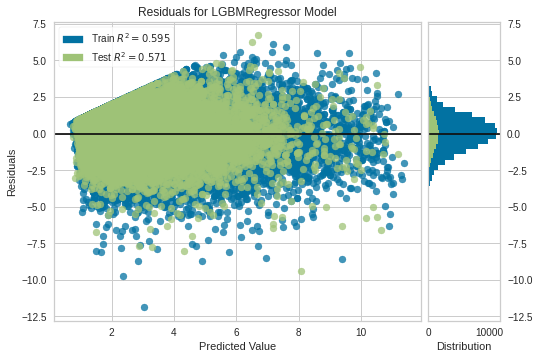

In [15]:
plot_model(model)

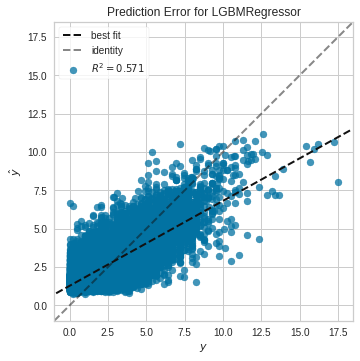

In [16]:
plot_model(model,plot = 'error')

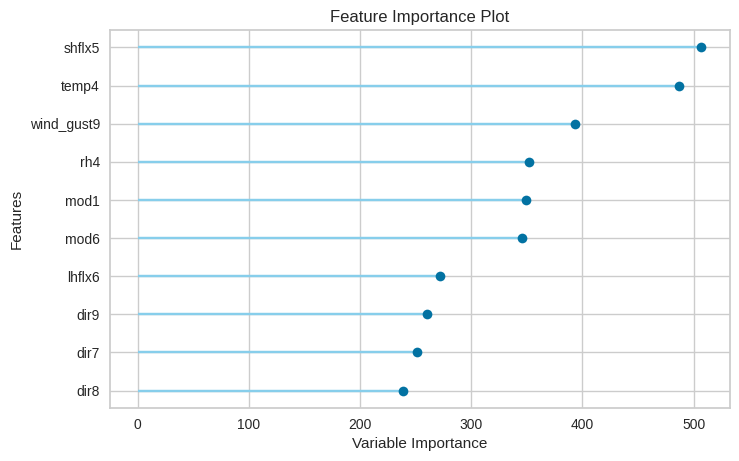

In [17]:
plot_model(model,plot = "feature")

**Export model**

In [18]:
x_var=get_config("X_train").columns
x_var

Index(['dir5', 'dir8', 'dir2', 'lhflx6', 'dir0', 'mod1', 'rh4', 'mod6', 'dir6',
       'dir4', 'dir7', 'wind_gust9', 'temp4', 'shflx5', 'dir9'],
      dtype='object')

In [19]:
#define x and y
Y=df_all4k.spd_o
X=df_all4k[x_var]

In [20]:
#Run the machine learning model
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm.sklearn import LGBMRegressor
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=1)
#ml_model=ExtraTreesClassifier(n_estimators=150).fit(X_train,y_train)
#ml_model=LGBMClassifier(n_estimators=250).fit(X_train,y_train)
ml_model=LGBMRegressor(n_estimators=150).fit(X_train,y_train)

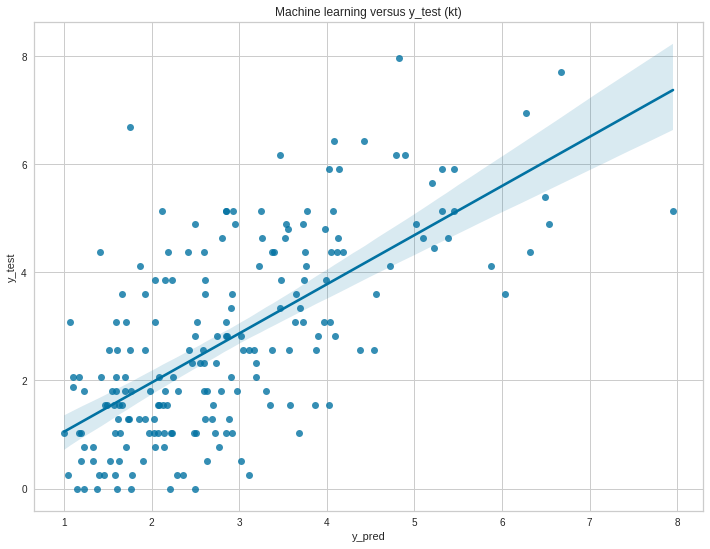

In [21]:
df_result=pd.DataFrame({"y_pred":ml_model.predict(X_test),"y_test":y_test})
plt.figure(figsize=(12, 9))
plt.title("Machine learning versus y_test (kt)")
sns.regplot( x="y_pred", y="y_test",data=df_result.sample(200));

In [22]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#MAE en kt
MAE=round(mean_absolute_error(df_result.y_pred,df_result.y_test),3)
#MSE en kt
MSE=round(mean_squared_error(df_result.y_pred,df_result.y_test),3)
#R2
R2=round(ml_model.score(X_test,y_test),2)


df_r=pd.DataFrame({"MAE":MAE,"MSE":MSE,"R2":R2},index=["results"]);
df_r

,MAE,MSE,R2
results,1.012,1.672,0.56


In [23]:
import pickle
model_dict={"x_var":x_var,"ml_model":ml_model,"coor":coor}
pickle.dump(model_dict, open("spd_LEVX_d1.al", 'wb'))